In [1]:
import numpy as np
import sympy as sp

import matplotlib.pyplot as plt

In [2]:
x_p = np.array(list(sp.primerange(1, 31)))
x_p

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29])

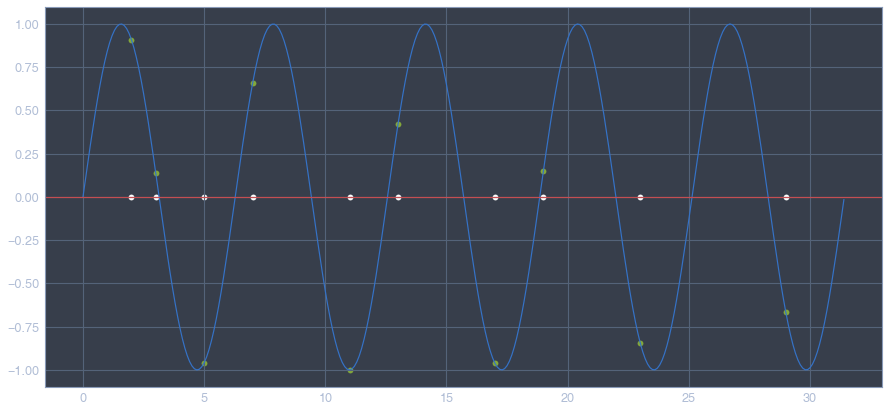

In [57]:
x = np.arange(0, 10*np.pi, 0.1)

fig, ax = plt.subplots(1, figsize=(15, 7))
ax.plot(x, np.sin(x))
ax.axhline(y=0, c='r')
ax.scatter(x_p, np.sin(x_p), c='g')
ax.scatter(x_p, np.sin(np.pi*x_p), c='w')

In [3]:
def calc__i_sp(n_um):
    i_sp = 1
    for v in range(2, int(np.floor(np.sqrt(n_um)))):
        i_sp *= 1 - np.floor(2**-np.abs(np.floor(n_um/v) - n_um/v))

    return i_sp

In [23]:
for p in x_p:
    print(calc__i_sp(p))

1
1
1
1
1.0
1.0
1.0
1.0
1.0
1.0


In [34]:
def calc__n_p(n):
    n_p = 0
    for v in range(2, int(np.ceil(np.e*n*np.log(n)))):
        n_p += np.floor(
            1
            /
            (
                np.floor(2**(sum([calc__i_sp(v2)-n for v2 in range(2, v)])))
                + 1
            )
        ) + 2
    
    return n_p

In [35]:
calc__n_p(9)

155.0